In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree # DecisionTreeClassifier is used to create a decision tree model for classification tasks. plot_tree is used to visualize the decision tree.
from sklearn.model_selection import train_test_split # train_test_split is used to split the dataset into training and testing sets.
from sklearn.metrics import (
    confusion_matrix, # Computes the confusion matrix to evaluate the accuracy of a classification.
    accuracy_score, # Computes the accuracy of the model.
    precision_score, # Computes the precision of the model.
    recall_score, # Computes the recall of the model.means the ability of the model to find all the relevant cases within a dataset.
    f1_score, # Computes the F1 score of the model. Means the harmonic mean of precision and recall.
    roc_curve, # Computes the Receiver Operating Characteristic (ROC) curve.
    auc, # Computes the Area Under the Curve (AUC) for the ROC curve.
)

# Make plots a bit larger by default
plt.rcParams['figure.figsize'] = (7, 5) # .rcParams is a dictionary-like variable that contains default settings for matplotlib which is used to customize the appearance of plots.



In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.5, 3.1, 4.5, 6.2, 7.9])

model = LinearRegression()
model.fit(X, y)

LinearRegression()

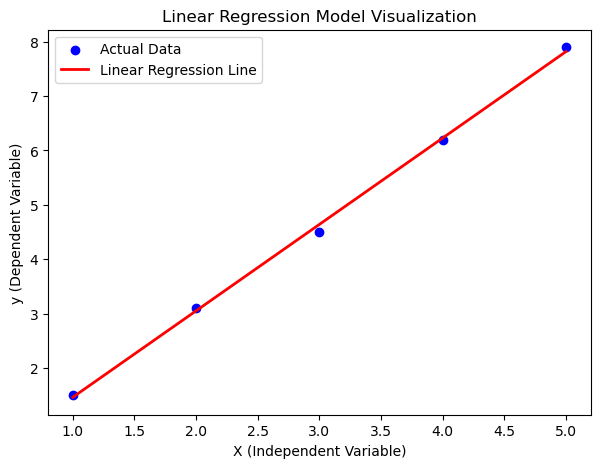

In [16]:
import matplotlib.pyplot as plt

# 1. Predict values for your training data
y_pred = model.predict(X)

# 2. Plot the original data points
plt.scatter(X, y, color='blue', label='Actual Data')

# 3. Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')

# 4. Add labels and title
plt.title('Linear Regression Model Visualization')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.show()

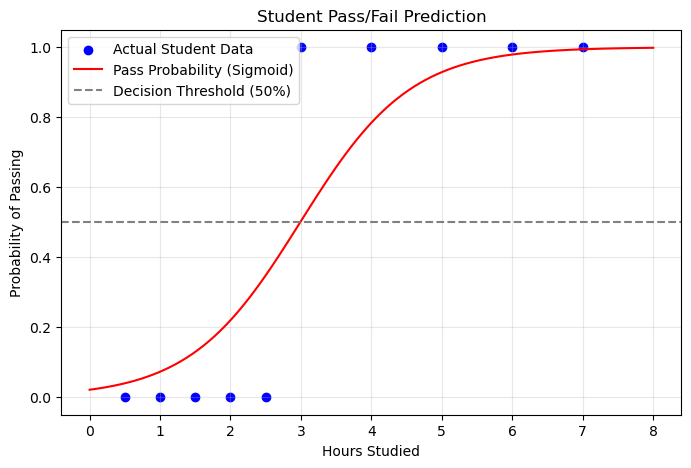

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Prepare Data: Study Hours (X) vs Pass/Fail (y)
X_train = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0]).reshape(-1, 1)
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # 0=Fail, 1=Pass

# 2. Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Visualize the Probability Curve
# Generate a range of study hours to plot a smooth sigmoid curve
X_test = np.linspace(0, 8, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of class 1 (Pass)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Actual Student Data')
plt.plot(X_test, y_prob, color='red', label='Pass Probability (Sigmoid)')

# Add a threshold line at 0.5 probability
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Threshold (50%)')

plt.title('Student Pass/Fail Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

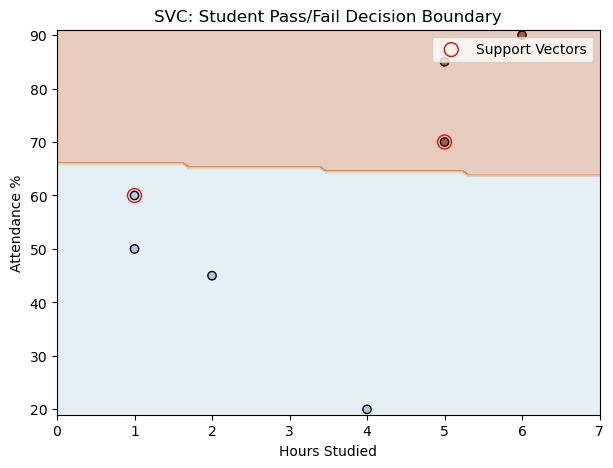

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# 1. Prepare Data: [Study Hours, Attendance %]
X_train = np.array([[1, 50], [2, 45], [1, 60], [5, 85], [6, 90], [5, 70], [4, 20]])
y_train = np.array([0, 0, 0, 1, 1, 1, 0])  # 0=Fail, 1=Pass

# 2. Train the Model
model = SVC(kernel='linear') # Use 'rbf' for non-linear boundaries
model.fit(X_train, y_train)

# 3. Visualize using DecisionBoundaryDisplay (Standard in 2025)
disp = DecisionBoundaryDisplay.from_estimator(
    model, 
    X_train, 
    response_method="predict",
    alpha=0.3,
    cmap=plt.cm.Paired
)

# Plot the original student data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k", cmap=plt.cm.Paired)

# Highlight the 'Support Vectors' (the critical points defining the boundary)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='r', label='Support Vectors')

plt.title("SVC: Student Pass/Fail Decision Boundary")
plt.xlabel("Hours Studied")
plt.ylabel("Attendance %")
plt.legend()
plt.show()

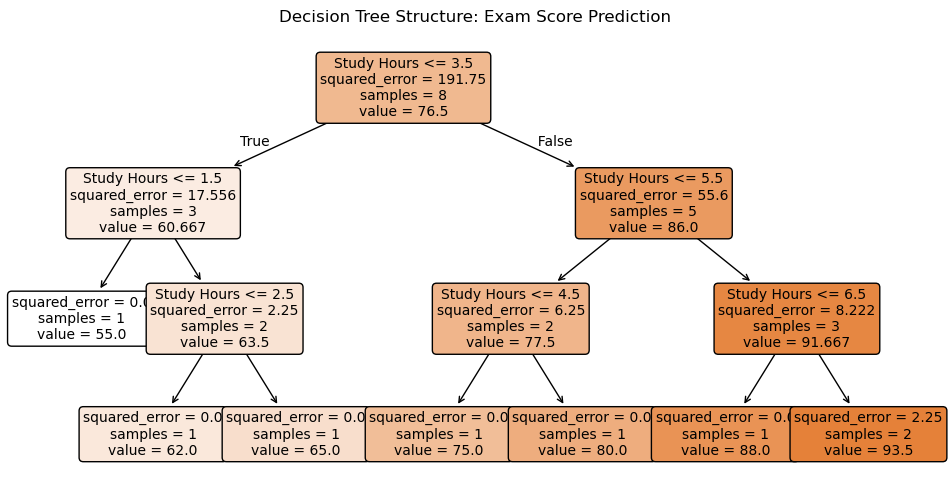

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# 1. Prepare Data: Study Hours (X) vs. Exam Score (y)
X_train = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
y_train = np.array([55, 62, 65, 75, 80, 88, 92, 95])



# 2. Train the Model (limit depth to 3 for easier visualization)
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

# 3. Visualize the Tree Structure
plt.figure(figsize=(12, 6))
plot_tree(model, 
          feature_names=["Study Hours"], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Structure: Exam Score Prediction")
plt.show()

example = pd.DataFrame({'Feature1': [5.1, 6.2],})



c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


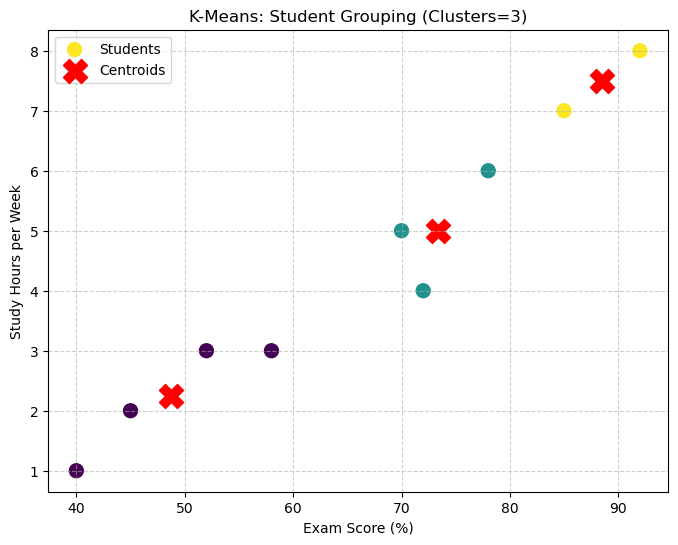

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Prepare Data: [Exam Score, Study Hours]
X = np.array([[85, 7], [92, 8], [78, 6], [45, 2], [52, 3], [58, 3], [70, 5], [72, 4], [40, 1]])

# 2. Train the Model
model = KMeans(n_clusters=3, random_state=42)
y_kmeans = model.fit_predict(X)  # Fits the model and assigns cluster labels

# 3. Visualize the Clusters and Centroids
plt.figure(figsize=(8, 6))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis', label='Students')

# Plot the centroids (cluster centers)
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, marker='X', label='Centroids')

# Add labels and formatting
plt.title('K-Means: Student Grouping (Clusters=3)')
plt.xlabel('Exam Score (%)')
plt.ylabel('Study Hours per Week')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [21]:
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


Tasks (20 marks total):

Compact EDA using pandas (6 marks)

Show missing value summary for each column.
Show number of unique values per column.
Show correlation among numeric columns.
Plot:
A histogram of purchases.
A bar chart for region frequency.
Preprocess the dataset using sklearn plus pandas (9 marks)

Impute age with median.
Impute purchases with mean.
One hot encode region.
Scale all numeric columns using RobustScaler.
Create one domain driven feature (3 marks)

Example ideas: high_spender based on purchases, or age_group bins, or an interaction like age * purchases.
Show the final transformed dataframe ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.

missing values for each column
age             2
region          0
purchases       1
premium_user    0
dtype: int64
unique values for each column
age             5
region          4
purchases       6
premium_user    2
dtype: int64
correlation among numerical columns
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


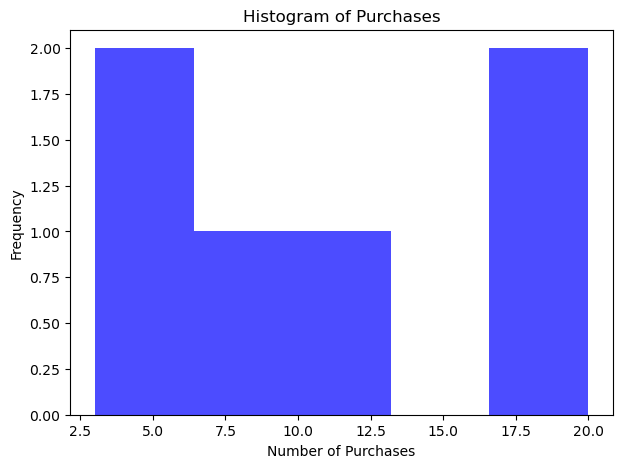

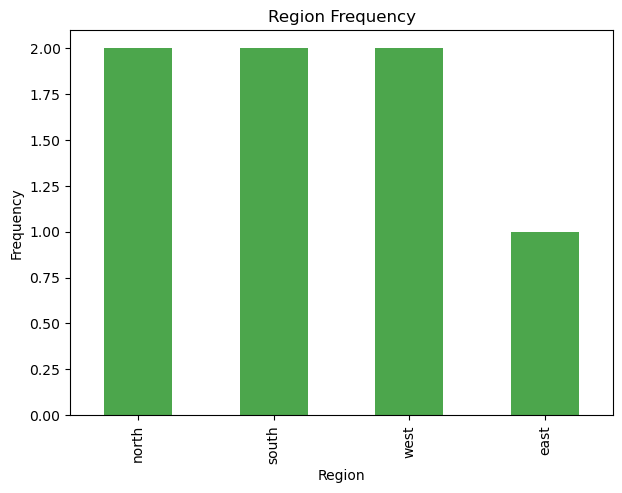

In [26]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

# Step 2: showing missing value summery for each column
missing_summary = df.isnull().sum()
print("missing values for each column")
print(missing_summary)

# step 3: showing number of unique values for each column
unique_summary = df.nunique()

print("unique values for each column")
print(unique_summary)

#step 4 : showing correlation among numerical columns
correlation_matrix = df.corr(numeric_only=True) # Added numeric_only=True
print("correlation among numerical columns")
print(correlation_matrix)


#plotting histogram of purchases column
import matplotlib.pyplot as plt
plt.hist(df['purchases'].dropna(), bins=5, color='blue', alpha=0.7)
plt.title('Histogram of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

# showing A bar chart for region frequency.
region_counts = df['region'].value_counts()
region_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Region Frequency')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Impute age with median.
# 1. Handle numeric missing values: Age
age_median = df["age"].median()
df["age"] = df["age"].fillna(age_median)
df["age"]


0    25.0
1    30.0
2    30.0
3    22.0
4    45.0
5    52.0
6    30.0
Name: age, dtype: float64